In [5]:
!ls data

ua.base  ua.test


In [6]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

epoch: 0, cost: 13.476159
epoch: 100, cost: 0.673564
epoch: 200, cost: 0.645172
epoch: 300, cost: 0.640795
epoch: 400, cost: 0.639757
epoch: 500, cost: 0.639172
epoch: 600, cost: 0.638877
epoch: 700, cost: 0.638796
epoch: 800, cost: 0.638793
epoch: 900, cost: 0.638813
epoch: 1000, cost: 0.638824


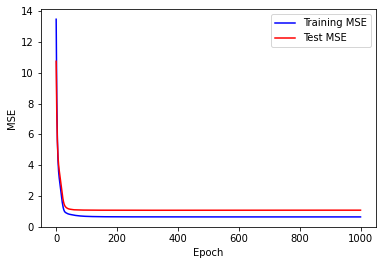

In [7]:
train = pd.read_csv("data/ua.base",sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
test = pd.read_csv("data/ua.test", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])

items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])
items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

optimizer = torch.optim.Adam([P, Q], lr= 0.1)
X = []
Y = []
Y_test = []
lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.001
lambda4 = 0.001
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()

for epoch in range(1001):
  hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
  cost = F.mse_loss(hypothesis ,ratings)
  loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) + lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  X.append(epoch)
  Y.append(cost)

  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + mean + bias_item[items_test] + bias_user[users_test]
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)

  if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()